*Importing all necessary libraries* 

In [13]:
import pandas as pd
import numpy as np
from os import listdir
import cv2 
import matplotlib.pyplot as plt

*Creating a dataframe using the annotations csv file, which shows the image name and corresponding facial features*

In [14]:
df = pd.read_csv('annotations.csv', index_col=0)
print(df.head())
print(df.tail())

                   wrinkles  freakles  glasses  hair_color  hair_top  \
image_name                                                             
unsplash_612.jpg          0         0        1           0         2   
unsplash_952.jpg          0         1        0           1         2   
unsplash_984.jpg          0         0        0           1         2   
unsplash_1003.jpg         0         0        0           3         2   
unsplash_1092.jpg         0         0        0           8         3   

                   no_face_shown  
image_name                        
unsplash_612.jpg               0  
unsplash_952.jpg               0  
unsplash_984.jpg               0  
unsplash_1003.jpg              0  
unsplash_1092.jpg              0  
                     wrinkles  freakles  glasses  hair_color  hair_top  \
image_name                                                               
unsplash_109715.jpg         0         0        0           1         2   
unsplash_109760.jpg         

*Shape shows how the dataframe looks, so here there are 1000 rows and 6 columns*

In [15]:
print(df.shape)

(1000, 6)


*Keys function shows the features/ column indexes in the csv file*

In [43]:
df.keys()

Index(['wrinkles', 'freakles', 'glasses', 'hair_color', 'hair_top',
       'no_face_shown'],
      dtype='object')

*Now lets check unique values and value counts in each column*

In [21]:
print('Unique values in wrinkles are:',sorted(df['wrinkles'].unique()))
print('Unique values in freakles are:',sorted(df['freakles'].unique()))
print('Unique values in glasses are:',sorted(df['glasses'].unique()))
print('Unique values in hair color are:',sorted(df['hair_color'].unique()))
print('Unique values in hair top are:',sorted(df['hair_top'].unique()))
print('Unique values in no face shown are:',sorted(df['no_face_shown'].unique()))

Unique values in wrinkles are: [0, 1]
Unique values in freakles are: [0, 1]
Unique values in glasses are: [0, 1, 2]
Unique values in hair color are: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique values in hair top are: [0, 1, 2, 3]
Unique values in no face shown are: [0, 1]


*The above output shows unique values in each column, every value represents a characteristic, for eg: In wrinkles and freakles '0' represents 'NO' and '1' represents 'YES'*

*The bar graphs below show the distribution of values accross different classes in every feature/column*

0    947
1     53
Name: wrinkles, dtype: int64


<AxesSubplot:>

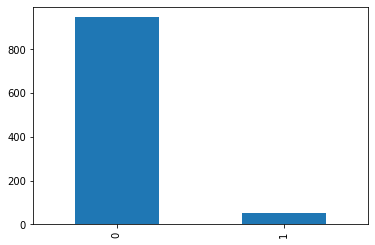

In [41]:
print(df.wrinkles.value_counts(sort=False))
df.wrinkles.value_counts().plot.bar()

0    921
1     79
Name: freakles, dtype: int64


<AxesSubplot:>

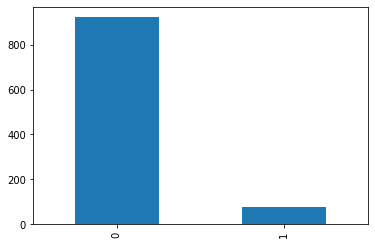

In [40]:
print(df.freakles.value_counts(sort=False))
df.freakles.value_counts().plot.bar()

0    859
1     82
2     59
Name: glasses, dtype: int64


<AxesSubplot:>

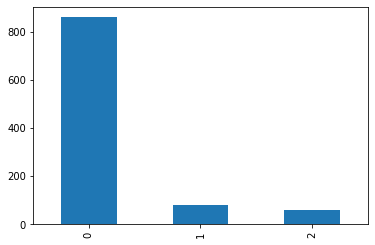

In [39]:
print(df.glasses.value_counts(sort=False))
df.glasses.value_counts().plot.bar()

0     78
1    254
2     10
3     61
4      3
5     16
6     43
7     14
8    521
Name: hair_color, dtype: int64


<AxesSubplot:>

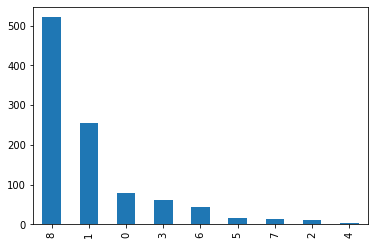

In [38]:
print(df.hair_color.value_counts(sort=False))
df.hair_color.value_counts().plot.bar()

0     19
1    118
2    612
3    251
Name: hair_top, dtype: int64


<AxesSubplot:>

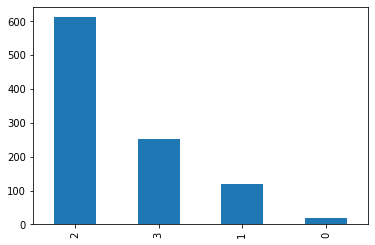

In [37]:
print(df.hair_top.value_counts(sort=False))
df.hair_top.value_counts().plot.bar()


0    983
1     17
Name: no_face_shown, dtype: int64


<AxesSubplot:>

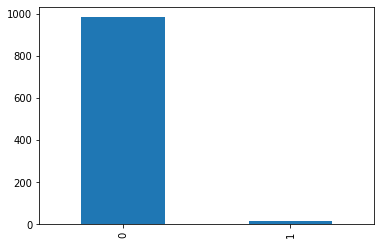

In [35]:
print(df.no_face_shown.value_counts())
df.no_face_shown.value_counts().plot.bar()

*Lets check if there are any null values in the dataframe*

In [49]:

df.isnull().sum()


wrinkles         0
freakles         0
glasses          0
hair_color       0
hair_top         0
no_face_shown    0
dtype: int64

*There are no null values, The data is clean*

In [50]:
df.corr()

,wrinkles,freakles,glasses,hair_color,hair_top,no_face_shown
wrinkles,1.000000,0.112741,-0.047408,0.028268,-0.081358,-0.031111
freakles,0.112741,1.000000,-0.082969,-0.030851,0.030853,-0.038515
glasses,-0.047408,-0.082969,1.000000,-0.052066,-0.005745,-0.049883
hair_color,0.028268,-0.030851,-0.052066,1.000000,0.337723,0.096812
hair_top,-0.081358,0.030853,-0.005745,0.337723,1.000000,0.145099
no_face_shown,-0.031111,-0.038515,-0.049883,0.096812,0.145099,1.000000


Importing all the images for training

A sample file name: unsplash_100233.jpg
Shape information of two arbitrary images: (64, 64, 3) - this one is shown below, and (533, 800, 3)


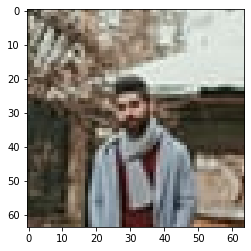

In [68]:
dir_struct = 'C:/Users/wania/Desktop/Coursework_1/images/'
file_lst = listdir(dir_struct) # it will return all the image file names as a list
print('A sample file name: {}'.format(file_lst[1]))

# Change color to RGB from OpenCV's BGR format since this library uses BGR format [rather than RGB] for historical purposes
# an interesting perspective on why OpenCV uses BGR : https://learnopencv.com/why-does-opencv-use-bgr-color-format/
image = cv2.imread(dir_struct+file_lst[1])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print('Shape information of two arbitrary images: {} - this one is shown below, and {}'.format(image.shape, cv2.imread(dir_struct+file_lst[5]).shape))
plt.imshow(image)

In [63]:
df  = pd.read_csv('C:/Users/wania/Desktop/Coursework_1/annotations.csv')
print('Number of images: ', df.shape[0])
print('The proportion of the different wrinkles labels: ')
# you may see equal proportion: logical since we have randomly assigned the label
df.groupby(['wrinkles']).count()

Number of images:  1000
The proportion of the different wrinkles labels: 


,image_name,freakles,glasses,hair_color,hair_top,no_face_shown
wrinkles,,,,,,
0,947,947,947,947,947,947
1,53,53,53,53,53,53


*Creating a new column which will hold all the images as arrays*

In [64]:
image_lst = [] # this list will hold all the images
#for i in range(1):
for i in range(df.shape[0]): # read the image one by one
    image = cv2.imread(dir_struct+df.iloc[i]['image_name'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB convert
    image = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA) # resizing all images to 32x32: NOT ideal but need to be uniform in order to apply the algorithm
                                                                                                                        # this actually ensures all the features [pixel values] will be of same size
    image_lst.append(image) # appending the read image to a list

,image_name,wrinkles,freakles,glasses,hair_color,hair_top,no_face_shown,image
0,unsplash_612.jpg,0,0,1,0,2,0,"[[[52, 59, 52], [52, 58, 51], [56, 59, 49], [6..."
1,unsplash_952.jpg,0,1,0,1,2,0,"[[[105, 127, 100], [106, 128, 101], [107, 129,..."
2,unsplash_984.jpg,0,0,0,1,2,0,"[[[184, 61, 75], [190, 63, 80], [195, 66, 86],..."
3,unsplash_1003.jpg,0,0,0,3,2,0,"[[[186, 224, 243], [187, 226, 246], [190, 228,..."
4,unsplash_1092.jpg,0,0,0,8,3,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


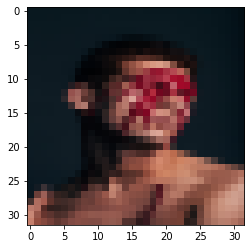

In [74]:
df['image'] = image_lst # creating a new column that holds all the images
# showing the same image that we have displayed before
# see the change because of resizing
plt.imshow(df.iloc[5]['image'])
df.head(5)

*Splitting the dataset into train and test*

In [81]:
from sklearn.model_selection import train_test_split
# ensures equal  proportion of the multi-class labels in training/testing set

X = df.drop(['image_name','wrinkles','freakles','glasses','hair_color','hair_top','no_face_shown'], axis=1)
y = df['wrinkles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)

In [87]:
print('Training dataset shape: {}'.format(X_train.shape))
print('Testing dataset shape: {}'.format(X_test.shape))
print('Training dataset shape: {}'.format(y_train.shape))
print('Testing dataset shape: {}'.format(y_test.shape))

print(X_train.head(10))

print(y_train.head(2))

Training dataset shape: (800, 1)
Testing dataset shape: (200, 1)
Training dataset shape: (800,)
Testing dataset shape: (200,)
                                                 image
971  [[[202, 182, 185], [174, 147, 143], [214, 192,...
437  [[[223, 224, 245], [223, 224, 245], [222, 223,...
238  [[[24, 23, 5], [21, 22, 4], [20, 23, 4], [19, ...
459  [[[140, 132, 124], [163, 152, 145], [212, 208,...
297  [[[34, 35, 37], [39, 40, 42], [47, 48, 50], [5...
3    [[[186, 224, 243], [187, 226, 246], [190, 228,...
603  [[[124, 120, 65], [119, 102, 56], [141, 116, 8...
898  [[[252, 253, 255], [252, 253, 255], [252, 253,...
474  [[[34, 34, 34], [34, 34, 34], [35, 35, 35], [3...
300  [[[46, 47, 49], [45, 46, 48], [45, 46, 48], [4...
971    0
437    0
Name: wrinkles, dtype: int64


In [107]:
X_train.shape[0]

800

In [108]:
# manually converting it to the similar shape as our other example
X_train['image'] = X_train['image'].apply(lambda x:x.reshape(1, 32, 32, 3)[0])
X_test['image'] = X_test['image'].apply(lambda x:x.reshape(1, 32, 32, 3)[0])

X_train = np.reshape([x for x in X_train['image'].values], (X_train.shape[0], 32, 32, 3))
X_test = np.reshape([x for x in X_test['image'].values], (X_test.shape[0], 32, 32, 3))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)
X_train /= 255
X_test /= 255

<ipython-input-108-639a2418b2f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['image'] = X_train['image'].apply(lambda x:x.reshape(1, 32, 32, 3)[0])
<ipython-input-108-639a2418b2f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['image'] = X_test['image'].apply(lambda x:x.reshape(1, 32, 32, 3)[0])


In [109]:
print('Flattened training dataset shape: {}'.format(X_train.shape))
print('Flattened Testing dataset shape: {}'.format(X_test.shape))

Flattened training dataset shape: (800, 32, 32, 3)
Flattened Testing dataset shape: (200, 32, 32, 3)


Modelling

In [111]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
%matplotlib inline

model = models.Sequential()

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", input_shape=(32,32,3)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))  ## END BLOCK 1
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))   ## END BLOCK 2
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 3 
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 4 
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 5 
model.add(layers.Flatten())    ## converting to vector 
model.add(layers.Dense(4096, activation="relu"))    ## 1st FC layer 
model.add(layers.Dense(4096, activation="relu"))    ## 2st FC layer 
model.add(layers.Dense(10, activation="softmax"))    ## output layer 




model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_______________________________________________

Epoch 1/10
2/2 [==============================] - 62s 20s/step - loss: 2.3010 - accuracy: 0.2325 - val_loss: 2.2817 - val_accuracy: 0.9450
Epoch 2/10
2/2 [==============================] - 30s 11s/step - loss: 2.2736 - accuracy: 0.9474 - val_loss: 2.1600 - val_accuracy: 0.9450
Epoch 3/10
2/2 [==============================] - 30s 11s/step - loss: 2.1120 - accuracy: 0.9500 - val_loss: 1.4935 - val_accuracy: 0.9450
Epoch 4/10
2/2 [==============================] - 30s 11s/step - loss: 1.3204 - accuracy: 0.9474 - val_loss: 0.4221 - val_accuracy: 0.9450
Epoch 5/10
2/2 [==============================] - 30s 11s/step - loss: 0.4427 - accuracy: 0.9468 - val_loss: 0.9602 - val_accuracy: 0.9450
Epoch 6/10
2/2 [==============================] - 30s 11s/step - loss: 0.8310 - accuracy: 0.9474 - val_loss: 0.6619 - val_accuracy: 0.9450
Epoch 7/10
2/2 [==============================] - 30s 11s/step - loss: 0.5804 - accuracy: 0.9455 - val_loss: 0.3035 - val_accuracy: 0.9450
Epoch 8/10
2/2 [===========

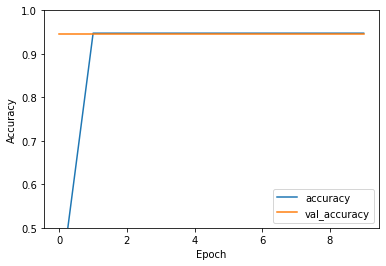

In [112]:
# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=512,
                    validation_data=(X_test, y_test))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

*Experimenting with other models*

In [114]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), padding = 'SAME', activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding = 'SAME', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding = 'SAME', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())

model.add(layers.Dense(10, activation='softmax'))

# as metric we choose the accuracy: the total number of correct predictions made
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [115]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

*Changing batch size and epochs*

Epoch 1/20
4/4 [==============================] - 2s 336ms/step - loss: 1.9389 - accuracy: 0.4883 - val_loss: 0.5178 - val_accuracy: 0.9450
Epoch 2/20
4/4 [==============================] - 1s 292ms/step - loss: 0.4684 - accuracy: 0.9481 - val_loss: 0.5810 - val_accuracy: 0.9450
Epoch 3/20
4/4 [==============================] - 1s 289ms/step - loss: 0.5182 - accuracy: 0.9471 - val_loss: 0.4290 - val_accuracy: 0.9450
Epoch 4/20
4/4 [==============================] - 1s 291ms/step - loss: 0.3410 - accuracy: 0.9496 - val_loss: 0.2932 - val_accuracy: 0.9400
Epoch 5/20
4/4 [==============================] - 1s 291ms/step - loss: 0.3165 - accuracy: 0.9417 - val_loss: 0.2501 - val_accuracy: 0.9450
Epoch 6/20
4/4 [==============================] - 1s 287ms/step - loss: 0.2448 - accuracy: 0.9488 - val_loss: 0.2849 - val_accuracy: 0.9450
Epoch 7/20
4/4 [==============================] - 1s 293ms/step - loss: 0.2400 - accuracy: 0.9505 - val_loss: 0.2631 - val_accuracy: 0.9450
Epoch 8/20
4/4 [====

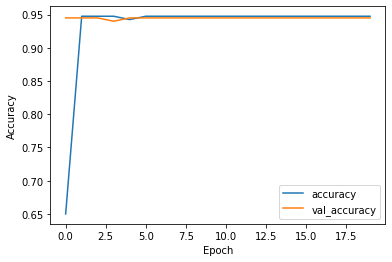

In [116]:
history = model.fit(X_train, y_train, epochs=20, batch_size=256,
                    validation_data=(X_test, y_test))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Model Predictions

In [117]:
predictions = model.predict(X_test)
predictions[0]

array([9.6156329e-01, 3.8388561e-02, 3.3215033e-06, 4.1791391e-06,
       4.7940939e-06, 5.0467520e-06, 2.0984592e-06, 1.7058994e-05,
       4.2226948e-06, 7.4343570e-06], dtype=float32)

In [118]:
predictions_index = np.argmax(predictions, axis=1) # Convert one-hot to index; remember indexing starts from 0; index takes integers values in [0,1]
predictions_index

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Using Data Augmentation 

Epoch 1/10
3/3 [==============================] - 42s 11s/step - loss: 8.6187 - accuracy: 0.2961 - val_loss: 0.6419 - val_accuracy: 0.9450
Epoch 2/10
3/3 [==============================] - 31s 11s/step - loss: 1.8929 - accuracy: 0.6849 - val_loss: 5.8794 - val_accuracy: 0.9450
Epoch 3/10
3/3 [==============================] - 34s 11s/step - loss: 3.2340 - accuracy: 0.9513 - val_loss: 18.9136 - val_accuracy: 0.0550
Epoch 4/10
3/3 [==============================] - 30s 10s/step - loss: 10.3880 - accuracy: 0.4719 - val_loss: 0.4613 - val_accuracy: 0.9450
Epoch 5/10
3/3 [==============================] - 30s 10s/step - loss: 0.3527 - accuracy: 0.9480 - val_loss: 0.2546 - val_accuracy: 0.9450
Epoch 6/10
3/3 [==============================] - 30s 10s/step - loss: 0.3066 - accuracy: 0.9480 - val_loss: 0.2183 - val_accuracy: 0.9450
Epoch 7/10
3/3 [==============================] - 30s 10s/step - loss: 0.4246 - accuracy: 0.6835 - val_loss: 0.7324 - val_accuracy: 0.9450
Epoch 8/10
3/3 [=========

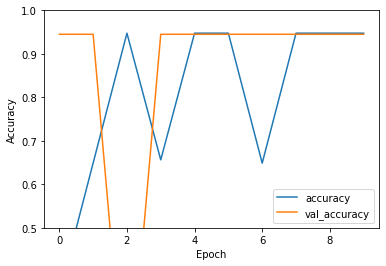

In [127]:
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Model
from tensorflow import keras

##  RandomContrast: Adjust the contrast of an image or images by a random factor.
##  RandomCrop: Randomly crop the images to target height and width.
##  RandomFlip: Randomly flip each image horizontally and vertically.
##  RandomHeight: Randomly vary the height of a batch of images during training.
##  RandomRotation: Randomly rotate each image.
##  RandomTranslation: Randomly translate each image during training.
##  RandomWidth: Randomly vary the width of a batch of images during training.
##  RandomZoom: Randomly zoom each image during training.
##  Rescaling: Multiply inputs by scale and adds offset.
##  Resizing: Image resizing layer.

# for specific details on the preprocessing layers have a look here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1),
    ]
)
# the augmentation is being made part of the model. Note that data augmentation is inactive at test time.

# Create a model that includes the augmentation stage
input_shape = (32, 32, 3)
classes = 10


inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

# Add the rest of the model
model = keras.applications.ResNet50(include_top=False,
    weights='imagenet', input_shape=input_shape)(x)

# add new classifier layers
flat1 = layers.Flatten()(model)
outputs = layers.Dense(10, activation='softmax')(flat1)



# define new model
model = Model(inputs=inputs, outputs= outputs)


model.compile(optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# define the checkpoint, have a look here for the arguments: https://keras.io/api/callbacks/model_checkpoint/
filepath = "ResNet-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]


# initialize the number of epochs and batch size
EPOCHS = 10
BS = 256


# train the network
history = model.fit(X_train, y_train, shuffle= True,
	validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // BS,
	epochs=EPOCHS)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

*Plotting images in grayscale*

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


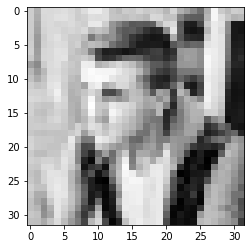

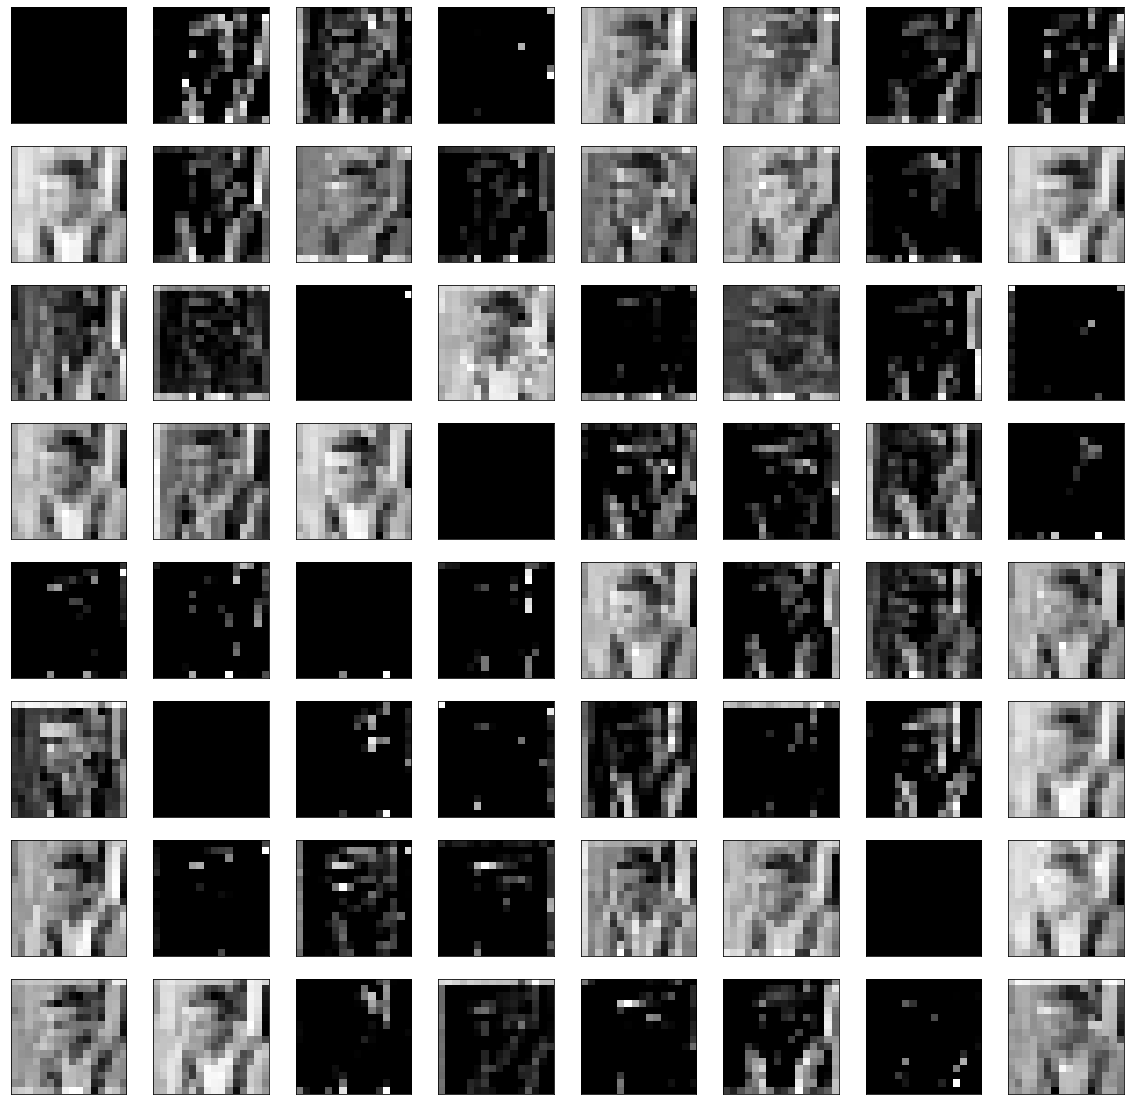

In [121]:
from numpy import expand_dims
from keras.models import Model

# redefine model to output right after the first hidden layer # you can change here the selected layer
model1 = Model(inputs=model.inputs, outputs=model.layers[1].output)
model1.summary()
# load the image with the required shape # you can change here the selected training/test image 
img = X_train[0]
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# get feature map for first hidden layer; the feature map has dimensions: 
feature_maps = model1.predict(img)
# plot all 64 maps in an 8x8 squares  # if you change the number of layers in the model you may need to change here the squares: their product should be equal to the number of feature maps in the layer that you have selected
square1 = 8
square2 = 8
ix = 1

plt.imshow(img[0][:,:,0], cmap=plt.cm.gray)


figure = plt.figure(figsize=(20, 20))
for _ in range(square1):
	for _ in range(square2):
		# specify subplot and turn of axis
		ax = figure.add_subplot(square1, square2, ix, xticks=[], yticks=[])
    # Display each image
		# plot filter channel in grayscale
		ax.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()